In [52]:
import pandas as pd
import matplotlib.pyplot as plt

## Cleaning the raw files
****

### Anime information
important data about individual anime providing sufficient information about trends in time about important aspects of anime
****
Columns explained:

    animeID: id of anime as in anime url https://myanimelist.net/anime/1
    name: title of anime
    premiered: premiered on. default format (season year)
    genre: list of genre
    type: type of anime (example TV, Movie etc)
    episodes: number of episodes
    studios: list of studio
    source: source of anime (example original, manga, game etc)
    scored: score of anime
    scoredBy: number of member scored the anime
    members: number of member added anime to their list

Determined unused columns:
- title_english
- title_japanese
- title_synonyms
- image_url
- type: TV,OVA,...
- aired_string: just string version of aired column's dict(contains from and to dates)
- duration
- background
- broadcast : time the manga is broadcasted
- premiered
- opening_theme
- ending_theme
- premiered
- licensor
- _source_? 
- _members_?

In [53]:
anime_info_raw = pd.read_csv('myanimelist/AnimeList.csv')
anime_info_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
anime_id          14478 non-null int64
title             14478 non-null object
title_english     5724 non-null object
title_japanese    14443 non-null object
title_synonyms    8937 non-null object
image_url         14382 non-null object
type              14478 non-null object
source            14478 non-null object
episodes          14478 non-null int64
status            14478 non-null object
airing            14478 non-null bool
aired_string      14478 non-null object
aired             14478 non-null object
duration          14478 non-null object
rating            14478 non-null object
score             14478 non-null float64
scored_by         14478 non-null int64
rank              12904 non-null float64
popularity        14478 non-null int64
members           14478 non-null int64
favorites         14478 non-null int64
background        1057 non-null object
premiered         40

In [82]:
anime_extracted = anime_info_raw.drop(columns=['aired_string','title_english','title_japanese', \
                                               'title_synonyms','image_url','type','duration', \
                                               'background','premiered','broadcast','opening_theme',\
                                               'ending_theme','licensor'])
anime_extracted.columns

Index(['anime_id', 'title', 'source', 'episodes', 'status', 'airing', 'aired',
       'rating', 'score', 'scored_by', 'rank', 'popularity', 'members',
       'favorites', 'related', 'producer', 'studio', 'genre'],
      dtype='object')

In [54]:
anime_info_raw['rank'].isna().value_counts() # contains null values

False    12904
True      1574
Name: rank, dtype: int64

In [55]:
anime_info_raw['score'].isna().value_counts() # no null values for score

False    14478
Name: score, dtype: int64

In [56]:
drop_na_rank_score = anime_info_raw.dropna(subset=['rank','score'])
drop_na_rank_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12904 entries, 0 to 14477
Data columns (total 31 columns):
anime_id          12904 non-null int64
title             12904 non-null object
title_english     5282 non-null object
title_japanese    12873 non-null object
title_synonyms    8257 non-null object
image_url         12812 non-null object
type              12904 non-null object
source            12904 non-null object
episodes          12904 non-null int64
status            12904 non-null object
airing            12904 non-null bool
aired_string      12904 non-null object
aired             12904 non-null object
duration          12904 non-null object
rating            12904 non-null object
score             12904 non-null float64
scored_by         12904 non-null int64
rank              12904 non-null float64
popularity        12904 non-null int64
members           12904 non-null int64
favorites         12904 non-null int64
background        1036 non-null object
premiered         40

### User list
information about users who watch anime
****


In [57]:
user_anime_list_raw = pd.read_csv('myanimelist/UserAnimeList.csv')
user_anime_list_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80076112 entries, 0 to 80076111
Data columns (total 11 columns):
username               object
anime_id               int64
my_watched_episodes    int64
my_start_date          object
my_finish_date         object
my_score               int64
my_status              int64
my_rewatching          float64
my_rewatching_ep       int64
my_last_updated        int64
my_tags                object
dtypes: float64(1), int64(6), object(4)
memory usage: 6.6+ GB


### User anime list
contains anime lists of all users
****

In [58]:
user_list_raw = pd.read_csv('myanimelist/UserList.csv')
user_list_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302675 entries, 0 to 302674
Data columns (total 17 columns):
username                    302674 non-null object
user_id                     302675 non-null int64
user_watching               302675 non-null int64
user_completed              302675 non-null int64
user_onhold                 302675 non-null int64
user_dropped                302675 non-null int64
user_plantowatch            302675 non-null int64
user_days_spent_watching    302675 non-null float64
gender                      217800 non-null object
location                    156774 non-null object
birth_date                  168749 non-null object
access_rank                 0 non-null float64
join_date                   302546 non-null object
last_online                 302546 non-null object
stats_mean_score            302546 non-null float64
stats_rewatched             302546 non-null float64
stats_episodes              302546 non-null float64
dtypes: float64(5), int64(6)

### using cleaned data

In [59]:
AnimesDF = pd.read_csv('myanimelist/anime_cleaned.csv')
AnimesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
anime_id           6668 non-null int64
title              6668 non-null object
title_english      3438 non-null object
title_japanese     6663 non-null object
title_synonyms     4481 non-null object
image_url          6666 non-null object
type               6668 non-null object
source             6668 non-null object
episodes           6668 non-null int64
status             6668 non-null object
airing             6668 non-null bool
aired_string       6668 non-null object
aired              6668 non-null object
duration           6668 non-null object
rating             6668 non-null object
score              6668 non-null float64
scored_by          6668 non-null int64
rank               6312 non-null float64
popularity         6668 non-null int64
members            6668 non-null int64
favorites          6668 non-null int64
background         813 non-null object
premiered          2

In [60]:
UsersDF = pd.read_csv('myanimelist/users_cleaned.csv')
UsersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
username                    108710 non-null object
user_id                     108711 non-null int64
user_watching               108711 non-null int64
user_completed              108711 non-null int64
user_onhold                 108711 non-null int64
user_dropped                108711 non-null int64
user_plantowatch            108711 non-null int64
user_days_spent_watching    108711 non-null float64
gender                      108711 non-null object
location                    108706 non-null object
birth_date                  108711 non-null object
access_rank                 0 non-null float64
join_date                   108711 non-null object
last_online                 108711 non-null object
stats_mean_score            108711 non-null float64
stats_rewatched             108711 non-null float64
stats_episodes              108711 non-null int64
dtypes: float64(4), int64(7), 

In [61]:
ScoresDF = pd.read_csv('myanimelist/animelists_cleaned.csv')
ScoresDF.info()
#only take the columns that are important for the recommendation system
ScoresDF = ScoresDF[['username', 'anime_id', 'my_score', 'my_status']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Data columns (total 11 columns):
username               object
anime_id               int64
my_watched_episodes    int64
my_start_date          object
my_finish_date         object
my_score               int64
my_status              int64
my_rewatching          float64
my_rewatching_ep       int64
my_last_updated        object
my_tags                object
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


In [62]:
#Counting how many relevant scores each user have done, resetting the index (so the series could become a DF again) and changing the column names
UsersAndScores = ScoresDF['username'].value_counts().reset_index().rename(columns={"username": "animes_rated", "index": "username"})

In [63]:
UsersAndScores.sort_values(by=['animes_rated'], inplace=True)
print("\nAll users and no. of animes rated:\n")
print(UsersAndScores.info())
print(UsersAndScores.min())
print(UsersAndScores.max())
print(UsersAndScores['animes_rated'].mean())
animes_rated_user_count=UsersAndScores.groupby('animes_rated').size().reset_index(name='no of users who made this many ratings')
print("\nNo of users grouped by no of animes rate:\n")
print(animes_rated_user_count.head())
animes_rated_user_count.tail()


All users and no. of animes rated:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108709 entries, 108708 to 0
Data columns (total 2 columns):
username        108709 non-null object
animes_rated    108709 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.5+ MB
None
username        ----phoebelyn
animes_rated                1
dtype: object
username        zzzzz-chan
animes_rated          6536
dtype: object
287.7755015684074

No of users grouped by no of animes rate:

   animes_rated  no of users who made this many ratings
0             1                                     248
1             2                                     425
2             3                                     516
3             4                                     504
4             5                                     517


,animes_rated,no of users who made this many ratings
2135,5234,1
2136,5912,1
2137,5923,1
2138,6367,1
2139,6536,1


In [64]:
UsersWith100plusRatings=UsersAndScores.loc[UsersAndScores['animes_rated'] >= 100]
print("\nUsers who rated 100+ animes:\n")
print(UsersWith100plusRatings.head())
print(UsersWith100plusRatings.info())
print(UsersWith100plusRatings.describe())


Users who rated 100+ animes:

         username  animes_rated
76884       KIIEA           100
76882       Mumen           100
76881   blazedEVH           100
76873  MissJC1987           100
76879        Amui           100
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77049 entries, 76884 to 0
Data columns (total 2 columns):
username        77049 non-null object
animes_rated    77049 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.8+ MB
None
       animes_rated
count  77049.000000
mean     387.242768
std      323.903729
min      100.000000
25%      180.000000
50%      291.000000
75%      481.000000
max     6536.000000


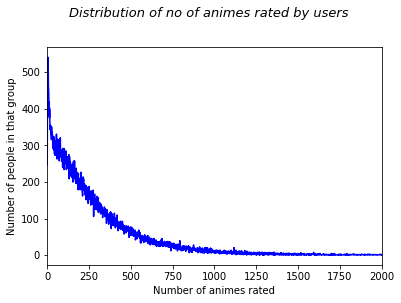

In [65]:
plt.suptitle("Distribution of no of animes rated by users", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('animes_rated', 'no of users who made this many ratings', data = animes_rated_user_count, color = 'blue')
plt.xlabel('Number of animes rated')
plt.ylabel('Number of people in that group')
plt.xlim(left = 0, right = 2000)
plt.show()

In [66]:
# merge user info and usersAndScore(no of animes they rated) tables
UserInfoAndScores = pd.merge(UsersAndScores, UsersDF, left_on = 'username', right_on = 'username', how = 'inner')

In [67]:
UserInfoAndScores.head()

,username,animes_rated,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,foodlove,1,189424,0,1,0,0,0,2.783333,Female,"phoenix, arizona",1993-06-08 00:00:00,NaN,2009-06-02 00:00:00,2010-11-24 22:42:00,0.0,0.0,167
1,yuki-kun,1,81972,0,1,0,0,0,0.850000,Male,kanagawa prefecture,1993-04-09 00:00:00,NaN,2008-08-01 00:00:00,2009-09-04 03:11:00,10.0,0.0,51
2,star12349999,1,227967,1,0,0,0,0,0.607639,Female,"Wesley Chapel,Florida",1997-05-13 00:00:00,NaN,2009-08-30 00:00:00,2009-09-10 21:15:00,10.0,0.0,35
3,mewnightfall,1,504798,0,1,0,0,0,0.850000,Female,"Parma,Ohio",1994-12-25 00:00:00,NaN,2011-06-28 00:00:00,2011-06-28 07:57:00,7.0,0.0,51
4,khrluver,1,353836,1,0,0,0,0,3.200000,Female,"Los Angeles, CA",1996-12-13 00:00:00,NaN,2010-07-11 00:00:00,2010-09-01 23:04:00,10.0,5.0,192


In [68]:
#Counting how many relevant scores each anime has, resetting the index (so the series could become a DF again) and changing the column names
RatedsPerAnime = ScoresDF['anime_id'].value_counts().reset_index().rename(columns={"anime_id": "number_of_users", "index": "anime_id"})
RatedsPerAnime.head()

,anime_id,number_of_users
0,1535,81332
1,1575,67721
2,226,64486
3,5114,63649
4,4224,63278


In [69]:
#Grouping users whom had the same amount of animes rated
AnimeRatedsAggregated = RatedsPerAnime['number_of_users'].value_counts().reset_index().rename(columns={"number_of_users": "no_of_anime_rated", "index": "number_of_users"}).sort_values(by=['number_of_users'])
AnimeRatedsAggregated.head()

,number_of_users,no_of_anime_rated
443,1,3
24,2,11
26,3,11
21,4,12
6,5,16


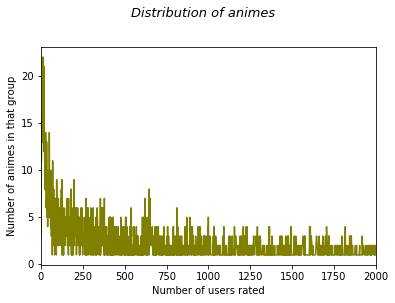

In [70]:
#Creating the plots so we can gather information about the distribution of ratings in the sample
plt.suptitle("Distribution of animes", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('number_of_users', 'no_of_anime_rated', data = AnimeRatedsAggregated, color = 'olive')
plt.xlabel('Number of users rated')
plt.ylabel('Number of animes in that group')
plt.xlim(left = 0, right = 2000)
plt.show()